# 1. Шпаргалка по jupyter-notebook

    > Справка > Сочетания клавиш (H)
    
### Два режима:
- Command Mode (press `Esc` to enable)
- Edit Mode (press `Enter` to enable)

### Command Mode

- `Shift + Enter` - run cell, select below
- `Ctrl + Enter` - run selected cells
- `A` - insert cell above
- `B` - insert cell below
- `X` - cut selected cells
- `C` - copy selected cells
- `V` - paste cells below
- `Z` - undo cell deletion
- `D, D` - delete selected cells
- `Shift + M` - merge selected cells, or current cell with cell below if only one cell is selected
- `L` - toggle line numbers
- `Y`, `M`, `R` - change cell to code, markdown, raw

### Edit Mode

- `Shift + Enter` - run cell, select below
- `Ctrl + Enter` - run selected cells
- `Shift + Tab` - tooltip


# 2. Генерация данных

`np.random.rand` - Create an array of the given shape and populate it with random samples from a uniform distribution over [0, 1)

In [1]:
import numpy as np

In [2]:
for _ in range(3):
    print(np.random.rand(4).round(3))

[0.373 0.391 0.097 0.704]
[0.205 0.128 0.441 0.439]
[0.75  0.819 0.297 0.22 ]


Как зафиксировать состояния генератора случайных чисел?

In [3]:
for _ in range(3):
    np.random.seed(3)
    print(np.random.rand(4).round(3))

[0.551 0.708 0.291 0.511]
[0.551 0.708 0.291 0.511]
[0.551 0.708 0.291 0.511]


Как генерировать данные из нормального распределения и из других распределений
https://numpy.org/doc/stable/reference/random/legacy.html#distributions

In [4]:
mean = 5
std = 2
size = 10
np.random.normal(mean, std, size)

array([4.44522359, 4.29048204, 4.83451704, 3.74599865, 4.91236366,
       4.04556394, 2.37227049, 6.76924476, 6.76263608, 8.41914613])

### Визуализация
Как визуально оценить распределение?

In [5]:
import seaborn as sns

<Axes: ylabel='Density'>

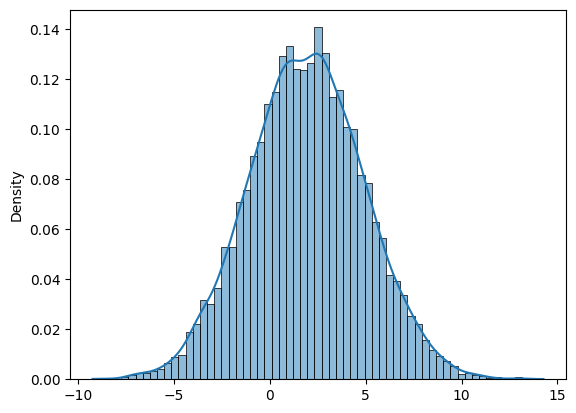

In [6]:
sns.histplot(np.random.normal(2, 3, 10000), stat='density', kde=True)

### Теоретические распределения

Как построить плотность распределения?

In [7]:
from scipy import stats
import matplotlib.pyplot as plt

In [8]:
stats.norm.pdf([0, 1, 5, 9, 100], loc=mean, scale=std)

array([0.00876415, 0.02699548, 0.19947114, 0.02699548, 0.        ])

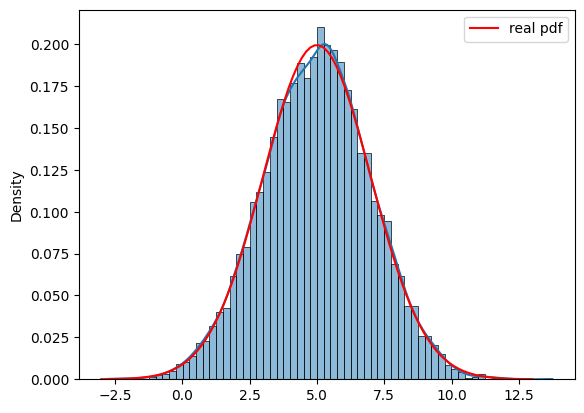

In [9]:
X = np.linspace(-3, 13, 100)
Y = stats.norm.pdf(X, loc=mean, scale=std)
sns.histplot(np.random.normal(mean, std, 10000), stat='density', kde=True)
plt.plot(X, Y, 'r', label='real pdf')
plt.legend()
plt.show()

### Распределение Стьюдента

Есть две выборки: $X_1,\ldots,X_{n_1}\sim N(\mu_1, \sigma_1)$ и $Y_1,\ldots,Y_{n_2}\sim N(\mu_2, \sigma_2)$.
    
Гипотезы: $H_0: \mathbb{E}{X} = \mathbb{E}{Y}$ и $H_1: \mathbb{E}{X} \neq \mathbb{E}{Y}$.

Статистика теста
$$t(X^n, Y^n) = \dfrac{\overline{Y} - \overline{X}}{\sqrt{\dfrac{S^2_X}{n_1} + \dfrac{S^2_Y}{n_2}}} \approx St(\nu), \qquad \nu = \frac{\left(\dfrac{S^2_X}{n_1} + \dfrac{S^2_Y}{n_2}\right)^2}{\dfrac{S_X^4}{n_1^2 (n_1 - 1)} + \dfrac{S_Y^4}{n_2^2 (n_2 - 1)}}$$


**Задание 1.** Чему равно $\nu$ при $S_X = S_Y$ и $n_1=n_2=n$ ?

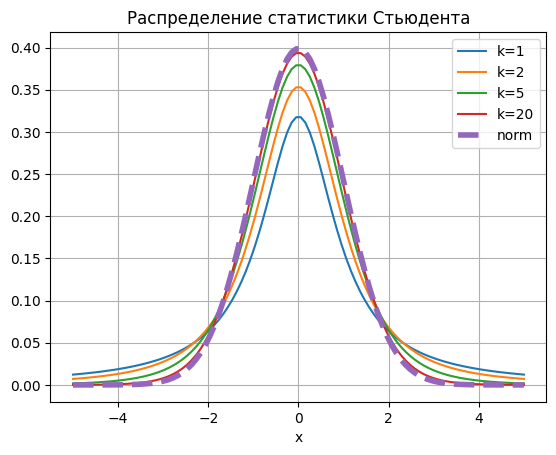

In [10]:
X = np.linspace(-5, 5, 100)
list_k = [1, 2, 5, 20]
for k in list_k:
    Y = stats.t.pdf(X, k)
    plt.plot(X, Y, label=f'k={k}')

Y = stats.norm.pdf(X, 0, 1)
plt.plot(X, Y, '--', label='norm', linewidth=4)

plt.legend()
plt.title('Распределение статистики Стьюдента')
plt.xlabel('x')
plt.grid()
plt.show()

### Выбор подмножества элементов

In [11]:
data = [0, 1, 2, 3, 4]
np.random.choice(data, 4, replace=False)

array([0, 2, 1, 3])

**Задание 2.** Есть список идентификаторов объектов. Как выбрать два непересекающихся подмножества заданных размеров без повторений?

In [12]:
ids = np.arange(10)

a, b = np.random.choice(ids, (2, 4), False)
print(a, b)
exp_ids = np.random.choice(ids, 3+6, False)
a = exp_ids[:6]
b = exp_ids[6:]
print(a, b)

[1 3 2 4] [0 5 8 7]
[9 1 0 8 6 2] [7 5 3]


# 3. Статистический критерий

Статистический критерий - математическое правило, позволяющее по реализациям выборок отвергнуть или не отвергнуть нулевую гипотезу с заданным уровнем значимости.

Как правило, принимаем бинарное решение: внедряем или не внедряем.

|                   | $H_0$ верна | $H_0$ неверна |
| :---------------- | :------: | ----: |
| Не отклоняем $H_0$|   TN   | FN |
| Отклоняем $H_0$   |   FP   | TP |

- **T**rue - верное решение
- **F**alse - неверное решение
- **N**egative - решили не внедрять изменения / стат.значимый эффект не обнаружен
- **P**ositive - решили внедрять изменения / стат.значимый эффект обнаружен

Два типа ошибок:
- Ошибка первого рода - *TN / FN / FP / TP* ?
- Ошибка второго рода - *TN / FN / FP / TP* ?

Не ошибаться нельзя, для этого нужно бесконечное количество данных.

Хотим контролировать вероятности ошибок.

### Корректность статистических критериев 

Будем называть статистический критерий **корректным**, если его вероятности ошибок первого и второго рода равны допустимым вероятностям ошибок первого и второго рода соответственно.

Вероятность ошибки первого рода по определению равна уровню значимости критерия. Если уровень значимости положить равным допустимой вероятности ошибки первого рода, то вероятность ошибки первого рода должна стать равной допустимой вероятности ошибки первого рода.

$$
\mathbb{P}(FP) = \mathbb{P}(\text{pvalue} < \alpha | H_0) = \alpha
$$

Из уравнения выше следует, что, если $H_0$ верна, то pvalue $\sim U[0, 1]$.

Это условие можно использовать для проверки корректности критерия.

### Эмпирическая функция распределения
Эмпирическая функция распределения $\hat{F}_n$ имеет вид

$$
\hat{F}_n(x) = \frac{\sum_{i=1}^n I(X_i \leq x)}{n}\qquad ,где\ 
I(X_i\leq x)=
\left\{
    \begin{aligned}
        1, X_i \leq x \\
        0, X_i > x
    \end{aligned}
\right. 
$$

**Задание 3.** Допишите реализацию функции `plot_pvalue_distribution`, которая строит ЭФР полученных pvalue и проверяет распределение на равномерность. Для проверки на равномерность используйте функцию `stats.ks_1samp`.

In [12]:
def plot_pvalue_distribution(dict_pvalues, test_mode=False):
    """Рисует графики распределения pvalue."""
    X = np.linspace(0, 1, 1000)
    for key, pvalues in dict_pvalues.items():
        Y = [np.mean(pvalues <= x) for x in X]
        ks_pvalue = stats.ks_1samp(pvalues, lambda x: np.clip(x, 0, 1)).pvalue
        plt.plot(X, Y, label=f'{key}, ks_pvalue={ks_pvalue:0.3f}')
    plt.plot([0, 1], [0, 1], '--k', alpha=0.8)
    plt.title('Оценка распределения p-value', size=16)
    plt.xlabel('p-value', size=12)
    plt.legend(fontsize=12)
    plt.grid()
    plt.show()
    if test_mode:
        return Y, ks_pvalue

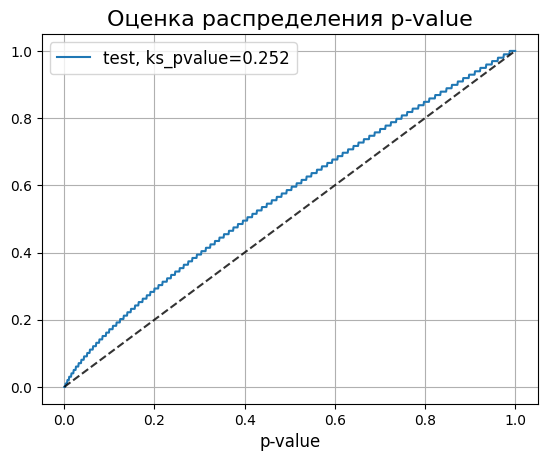

тесты пройдены


In [13]:
# тесты
Y, ks_pvalue = plot_pvalue_distribution({'test': np.linspace(0.01, 0.99, 99)**1.3}, True)

np.testing.assert_almost_equal(
    len(Y), 1000, 1, 'Неверное количество значений функции распределения')
np.testing.assert_almost_equal(
    sum(Y), 565.7475, 4, 'Неверная сумма значений функции распределения')
np.testing.assert_almost_equal(
    ks_pvalue, 0.2524, 4, 'Неверное pvalue теста КС')
print('тесты пройдены')

In [14]:
# plot_pvalue_distribution({'1': [0.02, 0.1, 0.6]})
# plot_pvalue_distribution({'1': np.random.rand(10000)})
# plot_pvalue_distribution({'1': np.random.rand(10000), '2': np.random.rand(10000) ** 3.2})

# 4. t-тест Стьюдента

Проверяем гипотезу о равенстве средних двух выборок.

#### Предположения:
- Средние значения выборок распределены нормально
- Дисперсии выборок равны
- Выборки независимы друг от друга

## Границы применимости

Хотим найти примеры данных, на которых тест работает некорректно.

**Задание 4.** Проверьте корректно ли работает критерий для данных из следующих распределений: нормальное, равномерное, экспоненциальное, логнормальное, биномиальное. Данные для обеих групп генерируйте из одинаковых распределений.

In [15]:
from collections import defaultdict

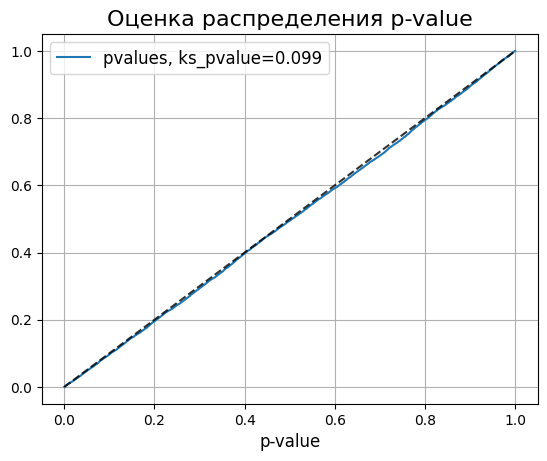

In [16]:
# пример
sample_size = 100
n_iter = 10000

pvalues = []
for _ in range(n_iter):
    a, b = np.random.normal(size=(2, sample_size))
    pvalue = stats.ttest_ind(a, b).pvalue
    pvalues.append(pvalue)
plot_pvalue_distribution({'pvalues': pvalues})

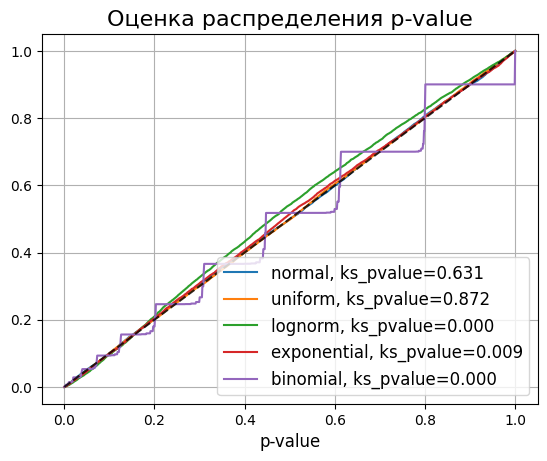

In [17]:
sample_size = 30
n_iter = 10000

dict_pvalues = defaultdict(list)
dict_datagen = {
    'normal': np.random.normal,
    'uniform': np.random.uniform,
    'lognorm': np.random.lognormal,
    'exponential': np.random.exponential,
    'binomial': lambda size: np.random.binomial(1, 0.5, size)
}

for name, datagen in dict_datagen.items():
    for _ in range(n_iter):
        a, b = datagen(size=(2, sample_size))
        pvalue = stats.ttest_ind(a, b).pvalue
        dict_pvalues[name].append(pvalue)
plot_pvalue_distribution(dict_pvalues)

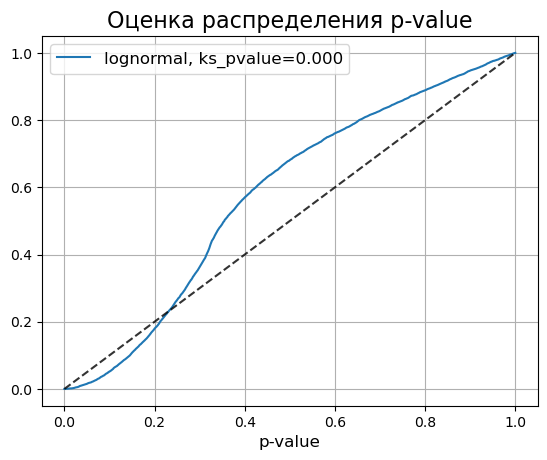

In [19]:
dict_pvalues = defaultdict(list)
for _ in range(n_iter):
    a, b = np.random.lognormal(2, 3, size=(2, sample_size))
    pvalue = stats.ttest_ind(a, b).pvalue
    dict_pvalues['lognormal'].append(pvalue)
plot_pvalue_distribution(dict_pvalues)

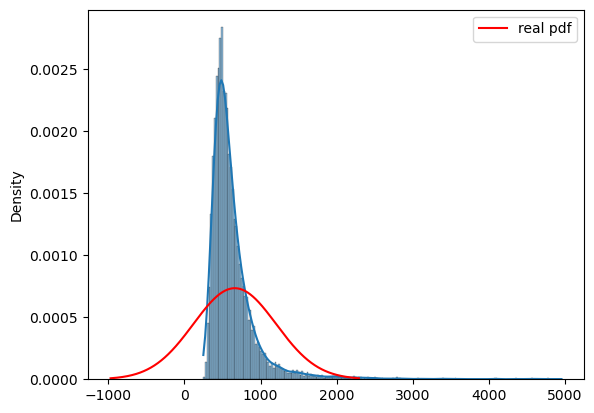

In [20]:
means = np.random.lognormal(2, 3, (10000, sample_size*100)).mean(axis=1)
mean_ = means.mean()
std_ = means.std()

X = np.linspace(mean_ - 3*std_, mean_ + 3*std_, 1000)
Y = stats.norm.pdf(X, loc=mean_, scale=std_)
sns.histplot(means[means < 5000], stat='density', kde=True)
plt.plot(X, Y, 'r', label='real pdf')
plt.legend()
plt.show()

**Задание 5**. Корректно ли работает критерий, если данные из разных распределений с одинаковыми средними и дисперсиями? Проверьте для данных из нормального, равномерного и экспоненциального распределений.

In [21]:
low = -12**0.5 / 2
print('uniform var =', stats.uniform.var(loc=low, scale=-2*low))
print('uniform mean =', stats.uniform.mean(loc=low, scale=-2*low))

print('expon var =', stats.expon.var(loc=-1))
print('expon mean =', stats.expon.mean(loc=-1))

sample_size = 10
n_iter = 10000

name2values = {
    'normal': np.random.normal(size=(n_iter, sample_size)),
    'uniform': np.random.uniform(low, -low, size=(n_iter, sample_size)),
    'expon': np.random.exponential(size=(n_iter, sample_size)) - 1 ,
}

for name, values in name2values.items():
    mean_ = np.mean(values)
    var_ = np.var(values)
    print(f'{name}: mean = {mean_:0.6f}, var = {var_:0.6f}')

uniform var = 0.9999999999999999
uniform mean = 0.0
expon var = 1.0
expon mean = 0.0
normal: mean = 0.002864, var = 1.000770
uniform: mean = -0.002362, var = 1.000735
expon: mean = 0.004297, var = 1.005568


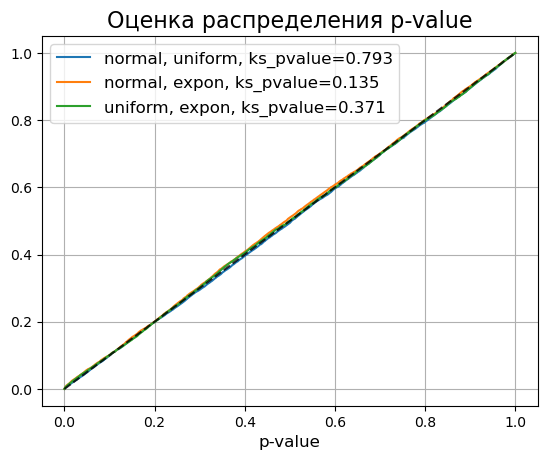

In [22]:
from itertools import combinations

dict_pvalues = defaultdict(list)
for name1, name2 in combinations(name2values.keys(), 2):
    for a, b in zip(name2values[name1], name2values[name2]):
        pvalue = stats.ttest_ind(a, b).pvalue
        dict_pvalues[f'{name1}, {name2}'].append(pvalue)
plot_pvalue_distribution(dict_pvalues)

**Задание 6**. Корректно ли работает критерий, если данные из одного распределения с одинаковыми средними и **разными** дисперсиями?

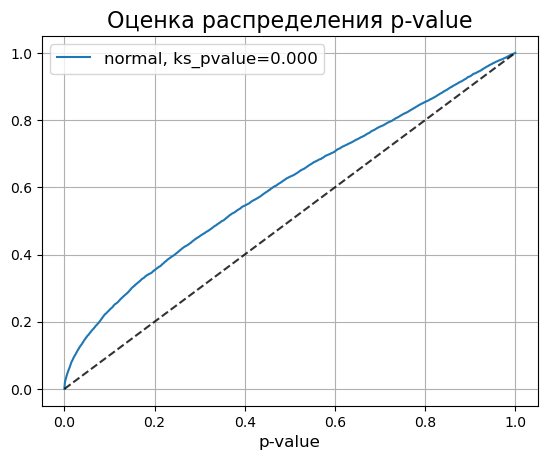

In [23]:
sample_size = 100
n_iter = 10000

dict_pvalues = defaultdict(list)
for _ in range(n_iter):
    a = np.random.normal(0, 1, size=sample_size*2)
    b = np.random.normal(0, 10, size=sample_size)
    pvalue = stats.ttest_ind(a, b, equal_var=True).pvalue
    dict_pvalues['normal'].append(pvalue)
plot_pvalue_distribution(dict_pvalues)

**Задание 7**. Как ещё сломать тест Стьюдента?

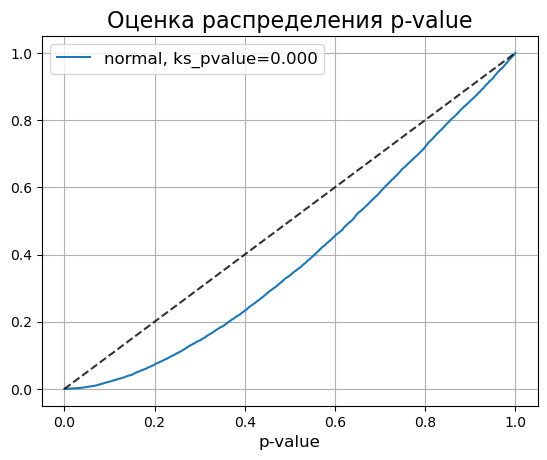

In [24]:
sample_size = 100
n_iter = 10000

mean_ = [0, 0]
cov_ = [[1, 0.5], [0.5, 1]] 

dict_pvalues = defaultdict(list)
for _ in range(n_iter):
    a, b = np.random.multivariate_normal(mean_, cov_, size=sample_size).T
    pvalue = stats.ttest_ind(a, b).pvalue
    dict_pvalues['normal'].append(pvalue)
plot_pvalue_distribution(dict_pvalues)

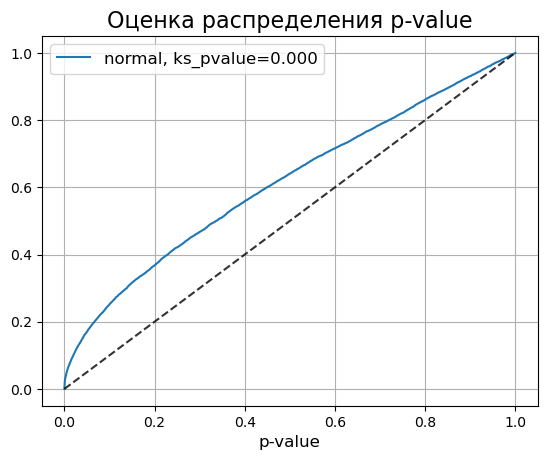

In [25]:
sample_size = 100
n_iter = 10000

dict_pvalues = defaultdict(list)
for _ in range(n_iter):
    a, b = np.random.normal(size=(2, sample_size // 2))
    a = np.hstack([a, a])
    b = np.hstack([b, b])
    pvalue = stats.ttest_ind(a, b).pvalue
    dict_pvalues['normal'].append(pvalue)
plot_pvalue_distribution(dict_pvalues)

## Мощность

Если эффект есть, то нужно его находить с заданной вероятностью.

Искусственно добавим эффект в экспериментальную группу и оценим мощность.

Как добавлять эффект?

In [26]:
def plot_pvalue_distribution_power(dict_pvalues, alpha=0.05):
    """Рисует графики распределения pvalue."""
    X = np.linspace(0, 1, 1000)
    for key, pvalues in dict_pvalues.items():
        Y = [np.mean(pvalues <= x) for x in X]
        prob_p = np.mean(np.array(pvalues) < alpha)
        plt.plot(X, Y, label=f'{key}, prob_p={prob_p:0.2f}')
    plt.plot([alpha, alpha], [0, 1], '--k', alpha=0.8)
    plt.plot([0, 1], [0, 1], '--k', alpha=0.8)
    plt.title('Оценка распределения p-value', size=16)
    plt.xlabel('p-value', size=12)
    plt.legend(fontsize=12)
    plt.grid()
    plt.show()

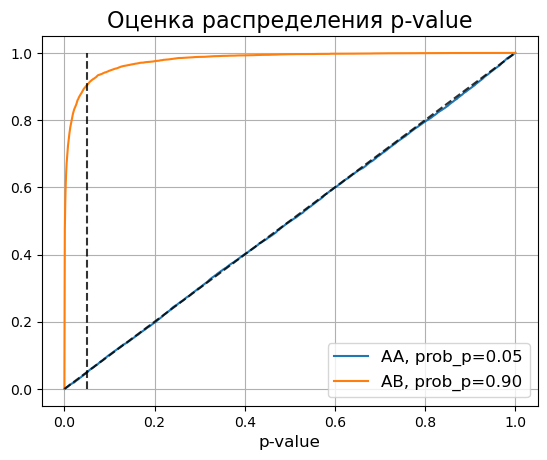

In [27]:
sample_size = 100
n_iter = 10000
effect = 0.46

dict_pvalues = defaultdict(list)
for _ in range(n_iter):
    a, b = np.random.normal(1, 1, size=(2, sample_size))
    pvalue = stats.ttest_ind(a, b).pvalue
    dict_pvalues['AA'].append(pvalue)
    b += effect
    pvalue = stats.ttest_ind(a, b).pvalue
    dict_pvalues['AB'].append(pvalue)
plot_pvalue_distribution_power(dict_pvalues)

**Задание 8**. 
- Как поменяется мощность при умножении на константу?
- Как добавить эффект, чтобы мощность увеличилась?

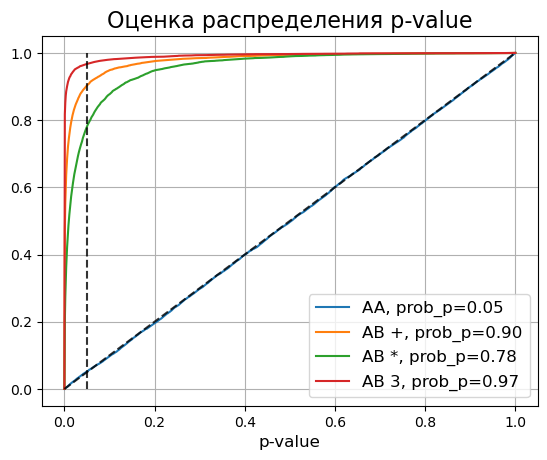

In [28]:
sample_size = 100
n_iter = 10000
effect = 0.46

dict_pvalues = defaultdict(list)
for _ in range(n_iter):
    a, b = np.random.normal(1, 1, size=(2, sample_size))
    pvalue = stats.ttest_ind(a, b).pvalue
    dict_pvalues['AA'].append(pvalue)
    b_1 = b + effect
    dict_pvalues['AB +'].append(stats.ttest_ind(a, b_1).pvalue)
    b_2 = b * (1 + effect / b.mean())
    dict_pvalues['AB *'].append(stats.ttest_ind(a, b_2).pvalue)
    b_3 = (b - b.mean()) / 10 + b.mean() + effect
    dict_pvalues['AB 3'].append(stats.ttest_ind(a, b_3).pvalue)
plot_pvalue_distribution_power(dict_pvalues)

- Способ добавления эффекта влияет на мощность;
- Мощность регулируется размером групп;
- Ошибка в оценке мощности приводит к ошибке в дизайне эксперимента.

**Задание 9.** Что будет если увеличить среднее значение измерений в 10 раз?

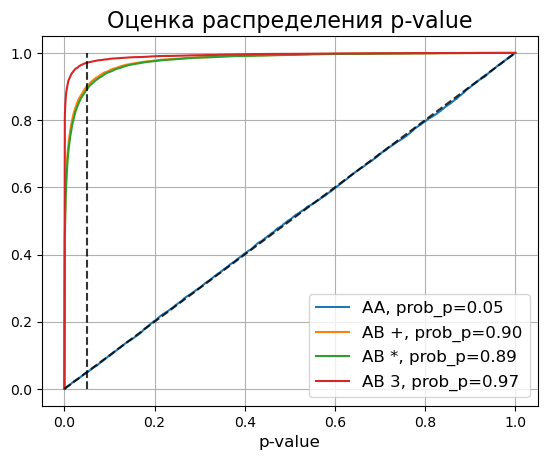

In [29]:
sample_size = 100
n_iter = 10000
effect = 0.46

dict_pvalues = defaultdict(list)
for _ in range(n_iter):
    a, b = np.random.normal(10, 1, size=(2, sample_size))
    pvalue = stats.ttest_ind(a, b).pvalue
    dict_pvalues['AA'].append(pvalue)
    b_1 = b + effect
    dict_pvalues['AB +'].append(stats.ttest_ind(a, b_1).pvalue)
    b_2 = b * (1 + effect / b.mean())
    dict_pvalues['AB *'].append(stats.ttest_ind(a, b_2).pvalue)
    b_3 = (b - b.mean()) / 10 + b.mean() + effect
    dict_pvalues['AB 3'].append(stats.ttest_ind(a, b_3).pvalue)
plot_pvalue_distribution_power(dict_pvalues)

**Задание 10.** 
- Что будет если добавить весь эффект в одно измерение (n=1)?
- Увеличим значение n, как меняется мощность?

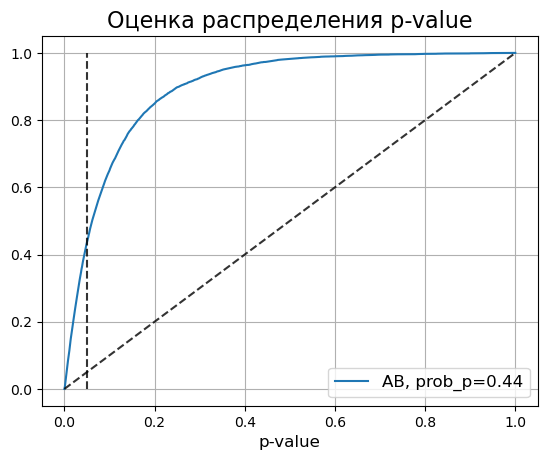

In [30]:
sample_size = 100
n_iter = 10000
effect = 0.46
n = 5    # количество изменившихся объектов

dict_pvalues = defaultdict(list)
for _ in range(n_iter):
    a, b = np.random.normal(1, 1, size=(2, sample_size))
    b[:n] += effect * sample_size / n
    dict_pvalues['AB'].append(stats.ttest_ind(a, b).pvalue)
plot_pvalue_distribution_power(dict_pvalues)

# 5. Проверка корректности на реальных данных

Распределение реальных данных может отличаться от популярных теоретических распределений.

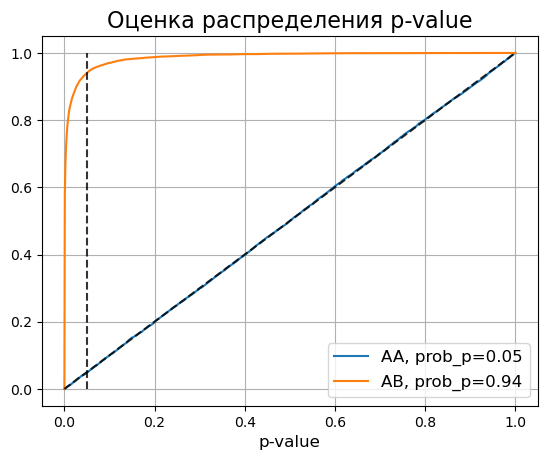

In [31]:
history_size = 50
sample_size = 100
n_iter = 10000
effect = 0.46

values = np.random.normal(10, 1, history_size)

dict_pvalues = defaultdict(list)
for _ in range(n_iter):
    a, b = np.random.choice(values, size=(2, sample_size), replace=True)
    pvalue = stats.ttest_ind(a, b).pvalue
    dict_pvalues['AA'].append(pvalue)
    b += effect
    pvalue = stats.ttest_ind(a, b).pvalue
    dict_pvalues['AB'].append(pvalue)
plot_pvalue_distribution_power(dict_pvalues)

# 6. Доверительный интервал

Доверительным интервалом с доверительной вероятностью $1-\alpha$ для параметра $\theta$ называется интервал $C_n=(a,b)$, где $a=a(X_1,\ldots,X_n)$ и $b=b(X_1,\ldots,X_n)$ - такие функции выборки, что $\mathbb{P}(\theta\in C_n)\geq 1-\alpha$.

Если ДИ содержит в себе значение оцениваемого параметра при верности нулевой гипотезу, то не отвергаем нулевую гипотезу, иначе отвергаем.

Например, если проверяем гипотезу о равенстве средних, то не отклоняем нулевую гипотезу, если ДИ содержит ноль, иначе отклоняем.



### ДИ для разности средних

Хотим построить ДИ для разности средних. Оцениваемый эффект - $\epsilon$, разность выборочных средних $\hat{\epsilon}$.

$$
\dfrac{\hat{\epsilon} - \epsilon}{\sigma} \sim N(0, 1)
$$

Доверительный интервал
$$C_n = \left( \hat{\epsilon}-z_{1-\frac{\alpha}{2} }\ \sigma,\ \hat{\epsilon}+ z_{1-\frac{\alpha}{2} }\ \sigma  \right)$$

Посмотрим как меняется ДИ и p-value при изменении размера эффекта

In [32]:
mu_a = 0
std = 10
sample_size = 1000

for effect in [5, 1, 0.847, 0.8, 0]:
    mu_b = mu_a + effect
    x_ = np.linspace(1/200, 199/200, sample_size)
    a_values = stats.norm.isf(x_, loc=mu_a, scale=std)
    b_values = stats.norm.isf(x_, loc=mu_b, scale=std)
    pvalue = stats.ttest_ind(a_values, b_values).pvalue

    std_ = (np.var(a_values) / sample_size + np.var(b_values) / sample_size) ** 0.5
    z = stats.norm.ppf(0.975)
    ci = (effect - z * std_, effect + z * std_)
    print(f'effect={effect:< 6}, pvalue={pvalue:0.4f}, ci=[{ci[0]:0.3f}, {ci[1]:0.3f}]')
    
    

effect= 5    , pvalue=0.0000, ci=[4.154, 5.846]
effect= 1    , pvalue=0.0206, ci=[0.154, 1.846]
effect= 0.847, pvalue=0.0499, ci=[0.001, 1.693]
effect= 0.8  , pvalue=0.0640, ci=[-0.046, 1.646]
effect= 0    , pvalue=1.0000, ci=[-0.846, 0.846]


**Задание 11**. Уменьшим размеры групп до 100.
- Размер эффекта, при котором pvalue=0.05, станет больше или меньше?
- Подберите размер эффекта, при котором pvalue=0.05.
- Равна ли левая граница ДИ нулю? Почему?

In [33]:
mu_a = 0
std = 10
sample_size = 100

for effect in [5, 3, 2.786, 1, 0]:
    mu_b = mu_a + effect
    x_ = np.linspace(1/200, 199/200, sample_size)
    a_values = stats.norm.isf(x_, loc=mu_a, scale=std)
    b_values = stats.norm.isf(x_, loc=mu_b, scale=std)
    pvalue = stats.ttest_ind(a_values, b_values).pvalue
    
    std_ = (np.var(a_values) / sample_size + np.var(b_values) / sample_size) ** 0.5
    z = stats.norm.ppf(0.975)
    ci = (effect - z * std_, effect + z * std_)
    print(f'effect={effect:< 6}, pvalue={pvalue:0.4f}, ci=[{ci[0]:0.3f}, {ci[1]:0.3f}]')

effect= 5    , pvalue=0.0005, ci=[2.246, 7.754]
effect= 3    , pvalue=0.0349, ci=[0.246, 5.754]
effect= 2.786, pvalue=0.0499, ci=[0.032, 5.540]
effect= 1    , pvalue=0.4797, ci=[-1.754, 3.754]
effect= 0    , pvalue=1.0000, ci=[-2.754, 2.754]


In [34]:
mu_a = 0
std = 10
sample_size = 100
for effect in [5, 3, 2.786, 1, 0]:
    mu_b = mu_a + effect
    x_ = np.linspace(1/200, 199/200, sample_size)
    a_values = stats.norm.isf(x_, loc=mu_a, scale=std)
    b_values = stats.norm.isf(x_, loc=mu_b, scale=std)
    pvalue = stats.ttest_ind(a_values, b_values).pvalue
    
    std_ = (
        np.var(a_values, ddof=1) / sample_size + np.var(b_values, ddof=1) / sample_size
    ) ** 0.5
    z = stats.t.ppf(0.975, df=2*sample_size-2)
    ci = (effect - z * std_, effect + z * std_)
    print(f'effect={effect:< 6}, pvalue={pvalue:0.4f}, ci=[{ci[0]:0.3f}, {ci[1]:0.3f}]')

effect= 5    , pvalue=0.0005, ci=[2.215, 7.785]
effect= 3    , pvalue=0.0349, ci=[0.215, 5.785]
effect= 2.786, pvalue=0.0499, ci=[0.001, 5.571]
effect= 1    , pvalue=0.4797, ci=[-1.785, 3.785]
effect= 0    , pvalue=1.0000, ci=[-2.785, 2.785]
